In this notebook I will study the equation that produced figure 2 of the paper. The matrix $U$ in the case is
$$\tag{1}
U = \begin{pmatrix}3 & 0 \\ 0 & 3 \end{pmatrix}.
$$

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math
import random

In [3]:
def list_mul_2d(M, m):
    """ M is a list of lists. Multiply each one of them by m."""
    return [[m * x for x in L] for L in M]

def f(h, t, U, extra = 0):  
    v = np.matmul(U, h)
    v0 = v[0, 0]
    v1 = v[0, 1]
    [x, y] = h
    
    xdot = 0.5*(np.tanh(v0) - x)
    ydot = 0.5*(np.tanh(v1) - y)
    
    return [xdot, ydot]

def solve(U, x_init):    
    times = np.linspace(0, 500, 2000)  
    xs = odeint(f, x_init, times, args = (U, 0))
    
    return xs

def eu_dist(x1, x2):
    """Euclidean distance between points x1 and x2 in R^n."""   
    return np.linalg.norm(x1 - x2)

def get_distance(x_init, xs):
    return [eu_dist(x_init, x) for x in xs]
    
def draw_phase_portrait(U, size=1, title_str='Phase portrait'):
    # Create the grid in the domain [-1, 1] x [-1, 1].
    lo, hi = -0.5*size, 0.5*size
    X, Y = np.meshgrid(np.linspace(lo, hi, 21), np.linspace(lo, hi, 21))
    u, v = np.zeros(X.shape), np.zeros(Y.shape)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            xp = f([X[i, j], Y[i, j]], 0, U)
            u[i,j] = xp[0]
            v[i,j] = xp[1]
   
    Q = plt.quiver(X, Y, u, v, color='r')
    
    plt.title(title_str)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.xlim([lo, hi])
    plt.ylim([lo, hi])
    x_inits = [[0.5, 0.5], [0.25, 0.5], [0, 0.5], [-0.25, 0.5], [-0.5, 0.5], \
              [-0.5, 0.25], [-0.5, 0], [-0.5, -0.25], [-0.5, -0.5], \
              [-0.25, -0.5], [0, -0.5], [0.25, -0.5], [0.5, -0.5], \
              [0.5, -0.25], [0.5, 0], [0.5, 0.25]]

    for x_init in list_mul_2d(x_inits, size):  
        times = np.linspace(0, 500, 2000)  
        xs = odeint(f, x_init, times, args = (U, 0))
        plt.plot(xs[:,0], xs[:,1], '-', color = 'black') # path
        plt.plot([xs[0,0]], [xs[0,1]], 'o', markersize = 2) # start
        plt.plot([xs[-1,0]], [xs[-1,1]], 's', markersize = 4, color='blue') # end

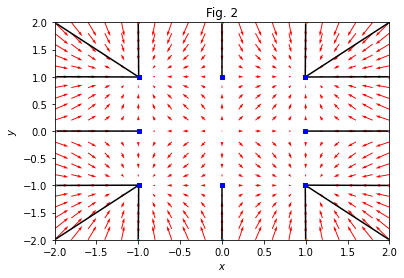

In [4]:
U = np.matrix([[3, 0],[0, 3]])
draw_phase_portrait(U, 4, 'Fig. 2')

Trajectories from the points along the perimeter converge to blue points. However, the origin is an instable point because trajectories seem to go away from it radially.

In [15]:
# Initial points on a small circle of radius 0.01.
r = 0.01
N = 10
x_inits = [[r*np.cos(2*n*np.pi/N), r*np.sin(2*n*np.pi/N)] for n in range(1, N + 1)]

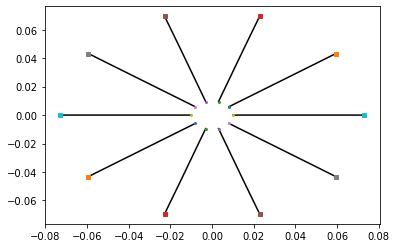

In [20]:
for x_init in x_inits:  
    times = np.linspace(0, 2, 2000)  
    xs = odeint(f, x_init, times, args = (U, 0))
    plt.plot(xs[:,0], xs[:,1], '-', color = 'black') # path
    plt.plot([xs[0,0]], [xs[0,1]], 'o', markersize = 2) # start
    plt.plot([xs[-1,0]], [xs[-1,1]], 's', markersize = 4) # end

The origin is indeed an unstable point. Trajectories that start along the circumference of a small circle go radially outward as time goes by.

Next we consider two points close to each other and also close to the origin. We follow trajectories from those points for a long enough duration and examine how they diverge from each other.

In [21]:
def eu_dist(x1, x2):
    """Euclidean distance between points x1 and x2 in R^n."""
    assert len(x1) == len(x2)
    return np.linalg.norm(x1 - x2)

In [31]:
xi0, xi1 = x_inits[0], x_inits[1]
times = np.linspace(0, 5, 2000) 
xf0 = odeint(f, xi0, times, args = (U, 0))
xf1 = odeint(f, xi1, times, args = (U, 0))

distances = [eu_dist(xf0[i], xf1[i]) for i in range(len(xf0))]

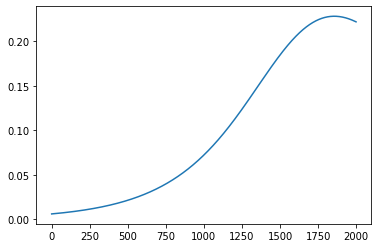

In [32]:
plt.plot(range(len(distances)), distances)

In [40]:
def get_random_weights(n):
    """Generate n random numbers whose total is 1."""
    R = random.sample(range(1, 11), n)
    return np.array([r/sum(R) for r in R])

def get_random_points(radius, n):
    """Generate n random points on a circle of given radius centred at the origin."""
    W = get_random_weights(n)
    points = [[radius*np.cos(2*np.pi*w), radius*np.sin(2*np.pi*w)] for w in W]
    
    return points

In [45]:
P = get_random_points(0.01, 5)
# Check that they are indeed on the circle.
for p in P:
    assert abs(eu_dist(p, np.array([0,0])) - 0.01) < 1e-6